In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv("C:/Users/Atwal/Desktop/ml/Google_Stock_Price_Train.csv")
train_set=data.iloc[:, 1:2].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X_scaled= sc.fit_transform(train_set)

In [13]:
#create a data structure with 60 timesteps and 1 output
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(X_scaled[i-60:i, 0])
    y_train.append(X_scaled[i,0])

X_train, y_train= np.array(X_train),np.array(y_train)    

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 1))
    

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
model = Sequential()

In [18]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
#fix for overtrain turn 20% neuron off

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [20]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [21]:
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [22]:
#output layer
model.add(Dense(units=1))

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
model.fit(X_train, y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 80s 66ms/step - loss: 0.0611
Epoch 2/100
1198/1198 [==============================] - 43s 36ms/step - loss: 0.0070
Epoch 3/100
1198/1198 [==============================] - 40s 34ms/step - loss: 0.0062
Epoch 4/100
1198/1198 [==============================] - 40s 34ms/step - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 41s 34ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 38s 32ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 38s 32ms/step - loss: 0.0073
Epoch 10/100
1198/1198 [==============================] - 38s 32ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 40s 34ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 39s 32ms/step - loss: 0.0041
Epoch 13/100
1198/1198 [==============================] - 44s 37ms/step - loss: 0.0044
Ep

1198/1198 [==============================] - 44s 37ms/step - loss: 0.0014
Epoch 95/100
1198/1198 [==============================] - 41s 34ms/step - loss: 0.0017
Epoch 96/100
1198/1198 [==============================] - 43s 36ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 41s 34ms/step - loss: 0.0012
Epoch 98/100
1198/1198 [==============================] - 44s 37ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 49s 41ms/step - loss: 0.0012
Epoch 100/100
1198/1198 [==============================] - 42s 35ms/step - loss: 0.0013


In [26]:
from keras.models import load_model
model.save("GoogleStockPredict.h5")


In [27]:
data_test=pd.read_csv("C:/Users/Atwal/Desktop/ml/Google_Stock_Price_Test.csv")
real_stock_price = data_test.iloc[:,1:2].values

In [32]:
data_total=pd.concat((data['Open'], data_test['Open']),axis=0)
inputs = data_total[len(data_total)-len(data_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_stock=model.predict(X_test)
pred_stock=sc.inverse_transform(pred_stock)


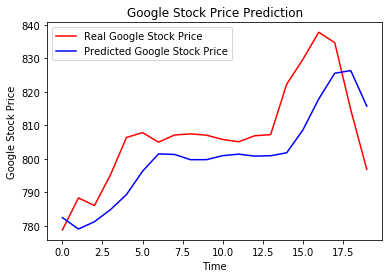

In [33]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(pred_stock,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()